In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data = data.dropna()
print("shape of data", data.shape)

shape of data (699, 2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [8]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [9]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


In [10]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [11]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [12]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(df, train_input, df))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

In [13]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Model Training

In [14]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 2505.76168035707


<Figure size 640x480 with 0 Axes>

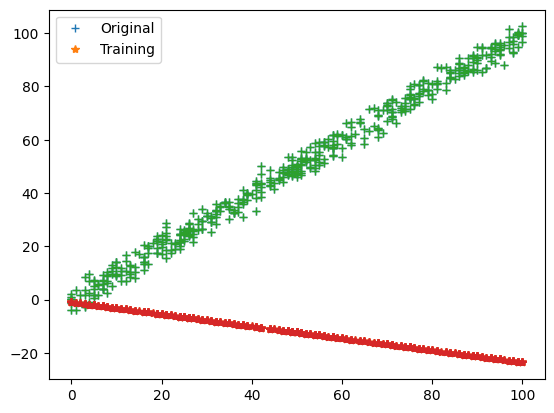

Iteration = 2, Loss = 1122.6448748832242


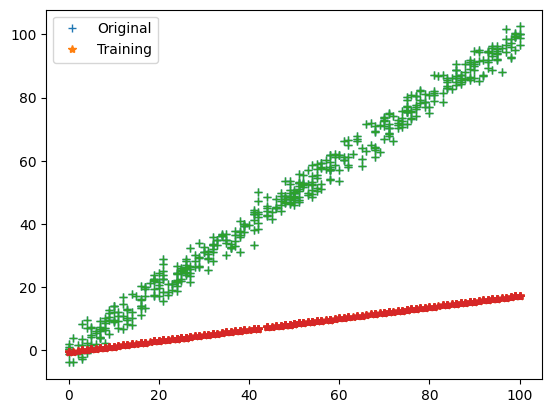

Iteration = 3, Loss = 504.16844846104783


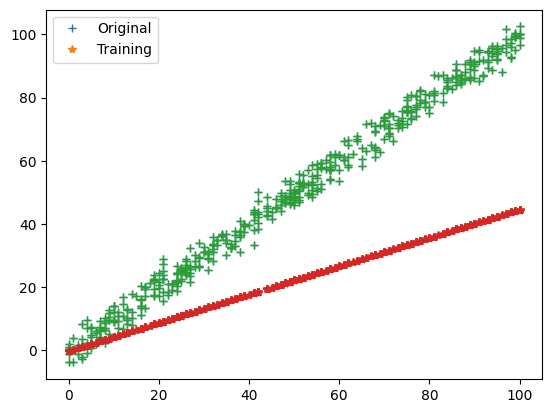

Iteration = 4, Loss = 227.6121042532733


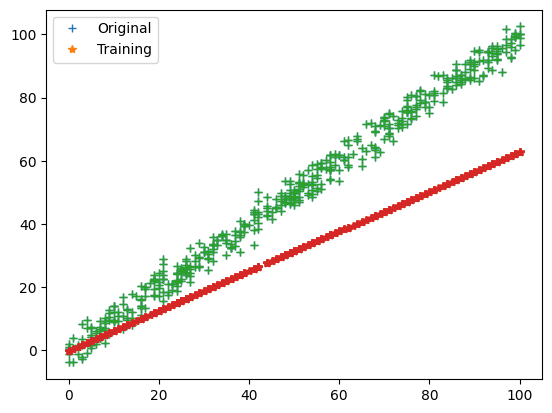

Iteration = 5, Loss = 103.94949931007999


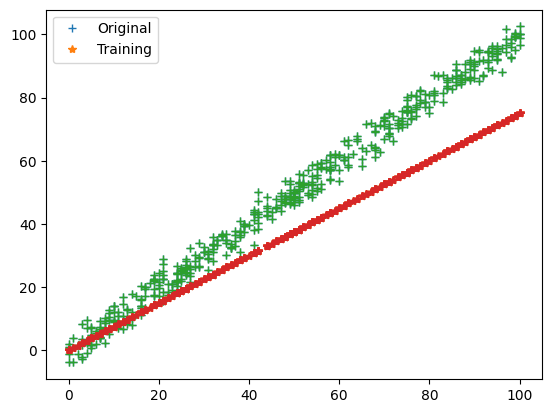

Iteration = 6, Loss = 48.65465794630988


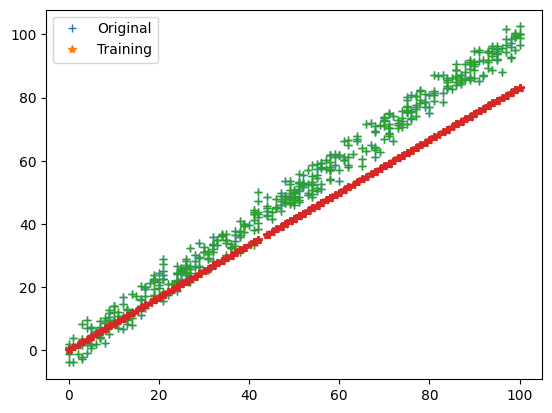

Iteration = 7, Loss = 23.930695744139047


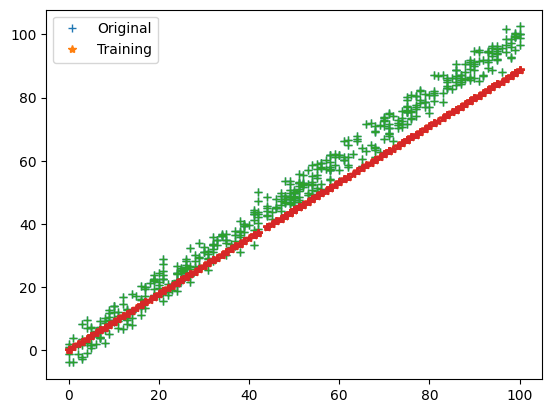

Iteration = 8, Loss = 12.876365788051631


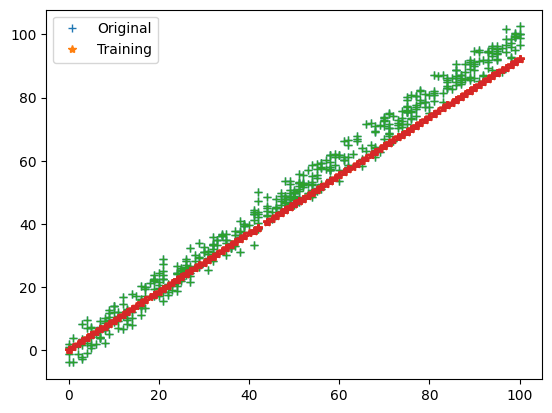

Iteration = 9, Loss = 7.9341898422118815


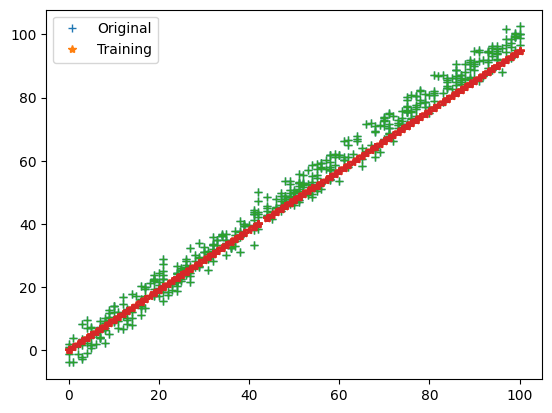

Iteration = 10, Loss = 5.724856561640965


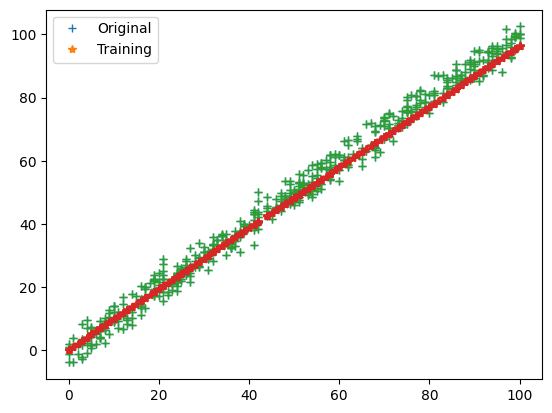

Iteration = 11, Loss = 4.737349290099705


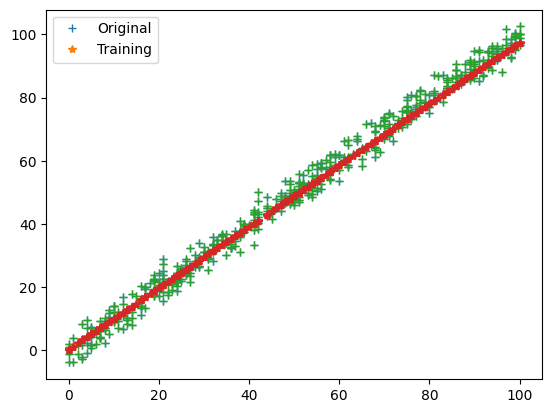

Iteration = 12, Loss = 4.296059756149512


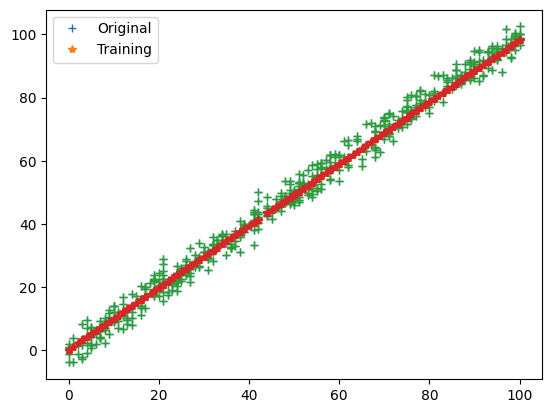

Iteration = 13, Loss = 4.098924828025828


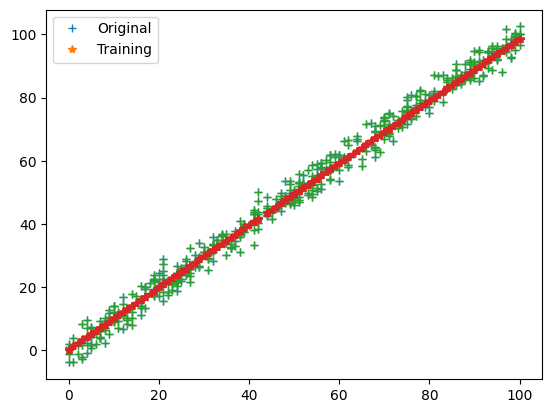

Iteration = 14, Loss = 4.010903345045559


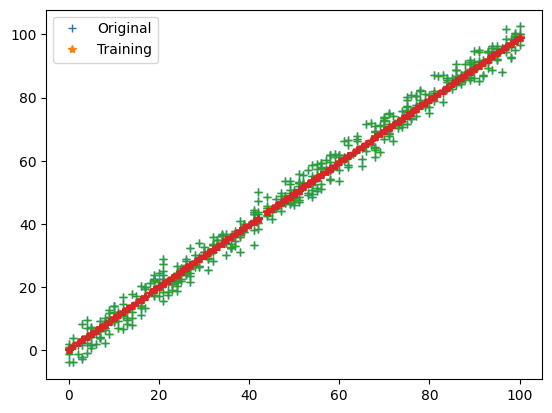

Iteration = 15, Loss = 3.971630578580528


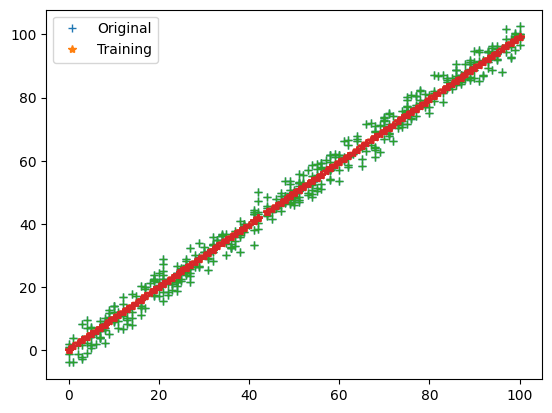

Iteration = 16, Loss = 3.954127674812706


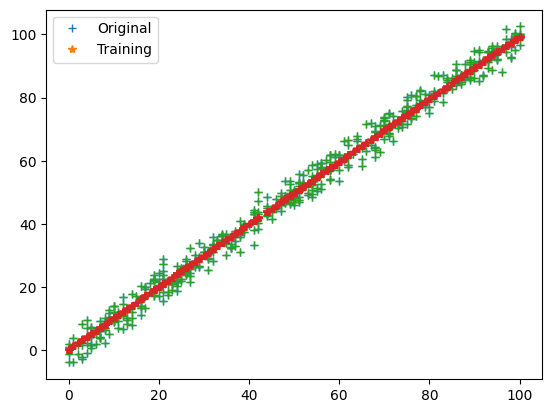

Iteration = 17, Loss = 3.9463401479587548


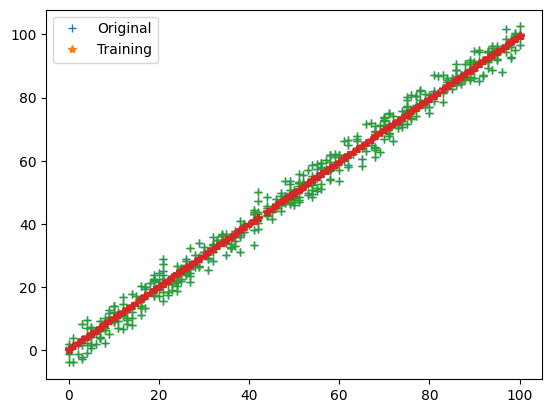

Iteration = 18, Loss = 3.9428840414094175


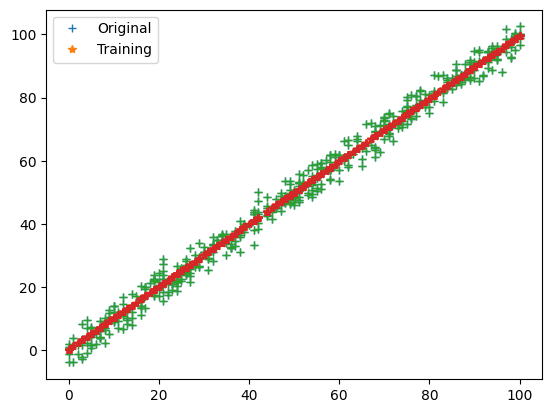

Iteration = 19, Loss = 3.941356121154883


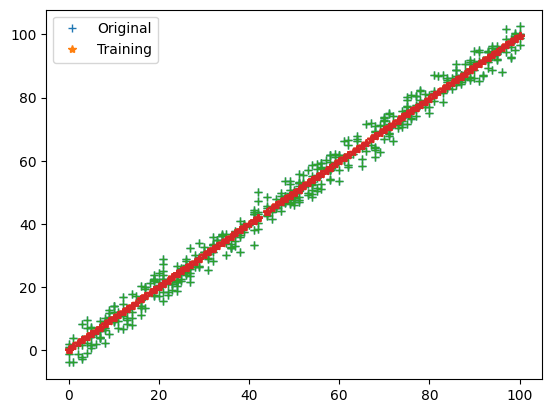

Iteration = 20, Loss = 3.9406846142673726


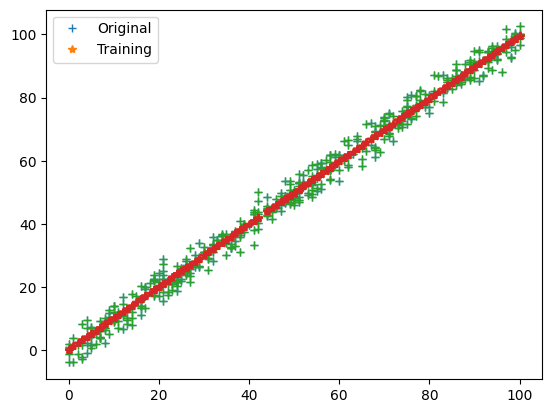

In [15]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [16]:
#parameters, loss = train(train_input, train_output, 0.1, 20)
#0.1 is a learning rate which is much higher

In [17]:
print(parameters)

{'m': 0.9932423940262989, 'c': 0.2501619186951185}


In [18]:
loss

[2505.76168035707,
 1122.6448748832242,
 504.16844846104783,
 227.6121042532733,
 103.94949931007999,
 48.65465794630988,
 23.930695744139047,
 12.876365788051631,
 7.9341898422118815,
 5.724856561640965,
 4.737349290099705,
 4.296059756149512,
 4.098924828025828,
 4.010903345045559,
 3.971630578580528,
 3.954127674812706,
 3.9463401479587548,
 3.9428840414094175,
 3.941356121154883,
 3.9406846142673726]

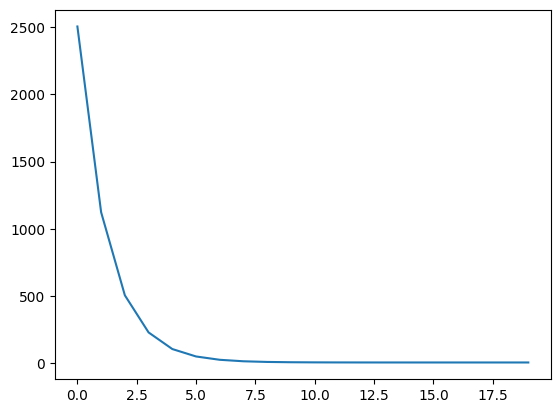

In [19]:
plt.plot(loss)

## Let's Predict

In [20]:
test_predictions = test_input * parameters['m'] + parameters['c']

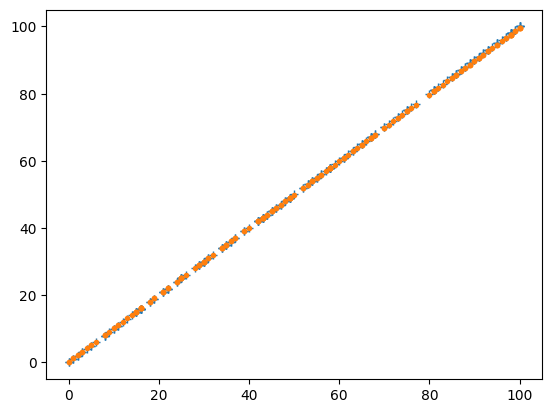

In [21]:
#test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost of predictions

In [22]:
cost_function(test_output, test_predictions)

0.02471090371736794